In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import preprocessing

#Пункт 1

#Датасет представляет собой информацию о работниках
#Age - Возраст
#Gender - Пол
#Education Level - Образование
#Job Title - Должность
#Years of Experience - Стаж
#Salary - Зарплата в тысячах

#В работе используется два датафрейма: df и new_df(в этом датафрейме отсутствуют атрибуты:
#Gender, Education level, Job Title)

In [60]:
df = pd.read_csv('SalaryData.csv')
df['Salary']=df['Salary']/1000

In [61]:
#Пункт 2
df.dropna(inplace=True)

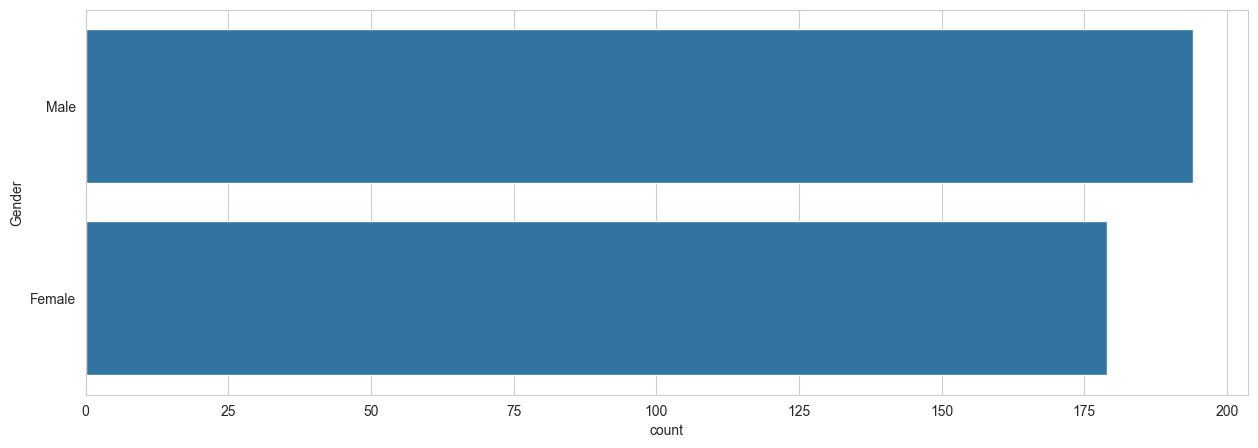

In [62]:
#Гистограмма количества женщин или мужчин в штате.
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

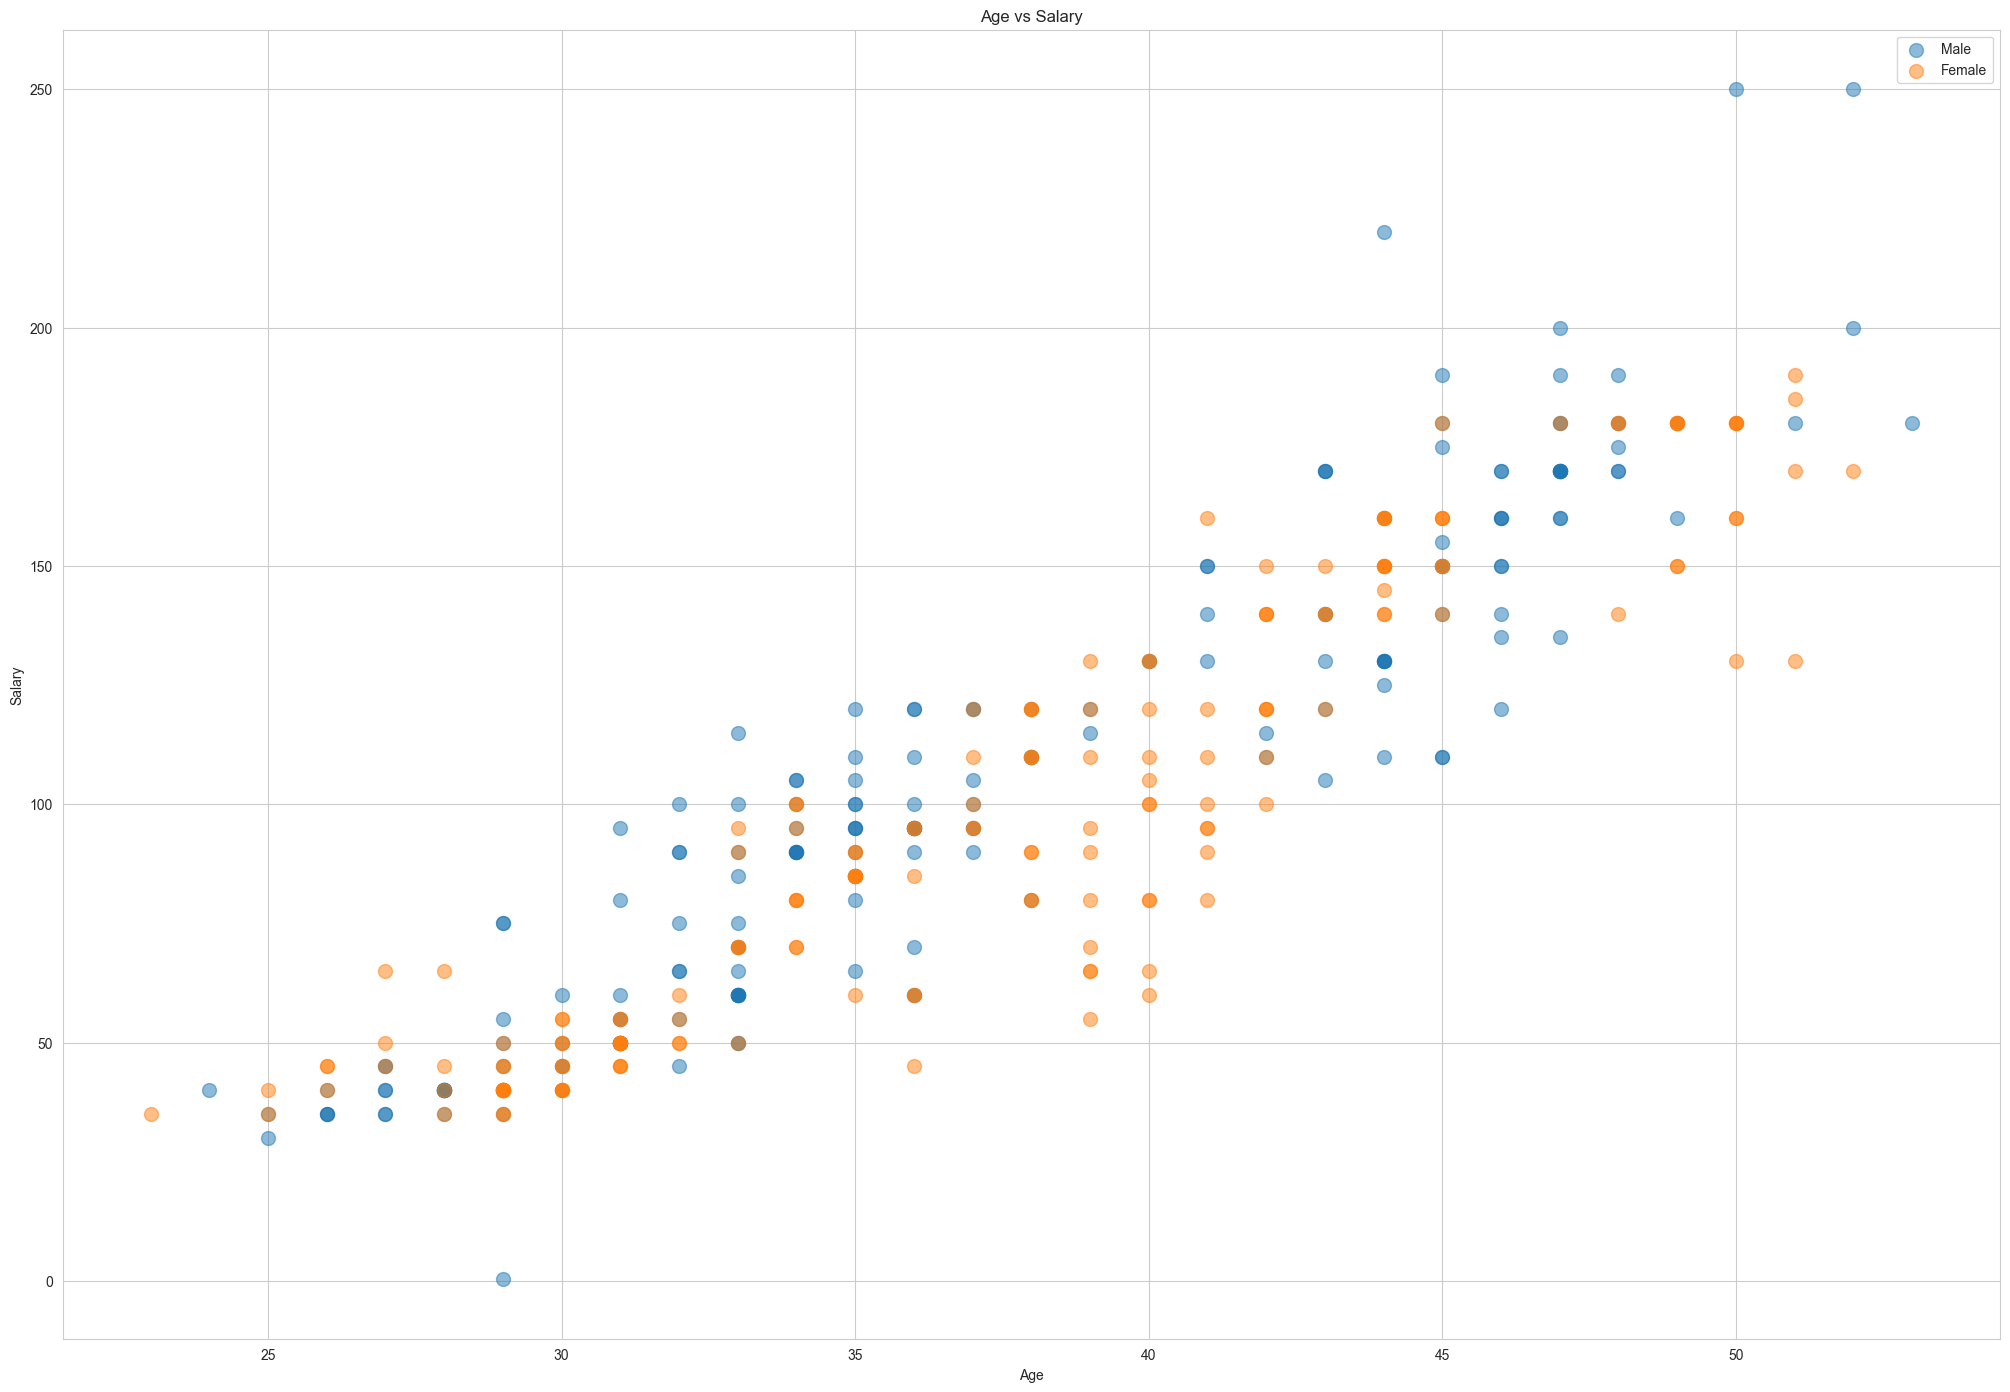

In [63]:
#Рассмотрим зависимость зарплаты от возраста на примере графика. 
plt.figure(1 , figsize = (25 , 17))
for type in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Salary' , data = df[df['Gender'] == type] ,
                s = 100 , alpha = 0.5 , label = type)
plt.xlabel('Age'), plt.ylabel('Salary') 
plt.title('Age vs Salary')
plt.legend()
plt.show()

In [64]:
X1 = df[['Age' , 'Salary']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

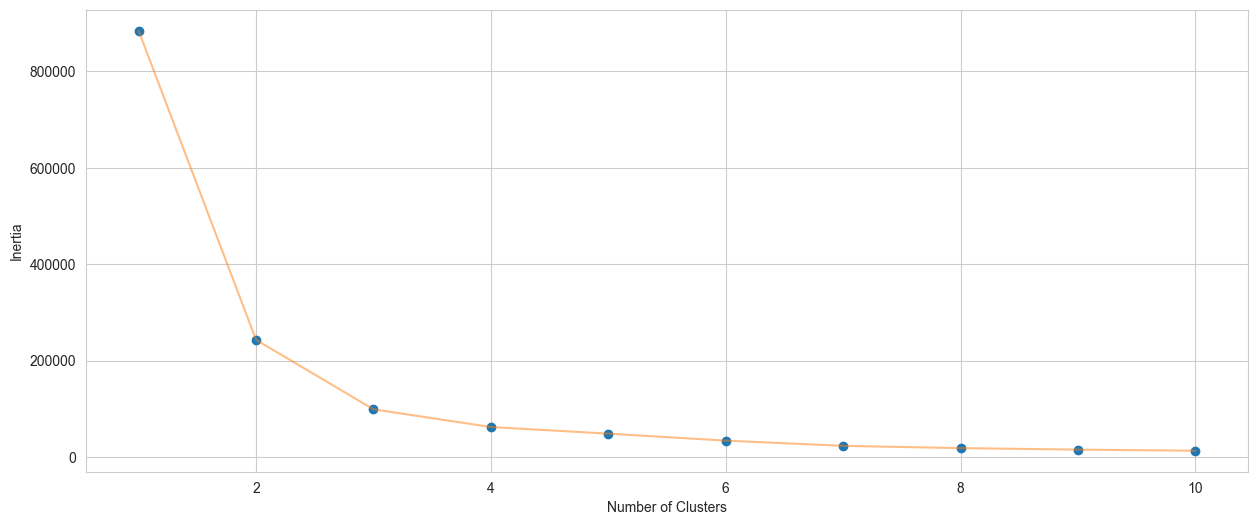

In [65]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

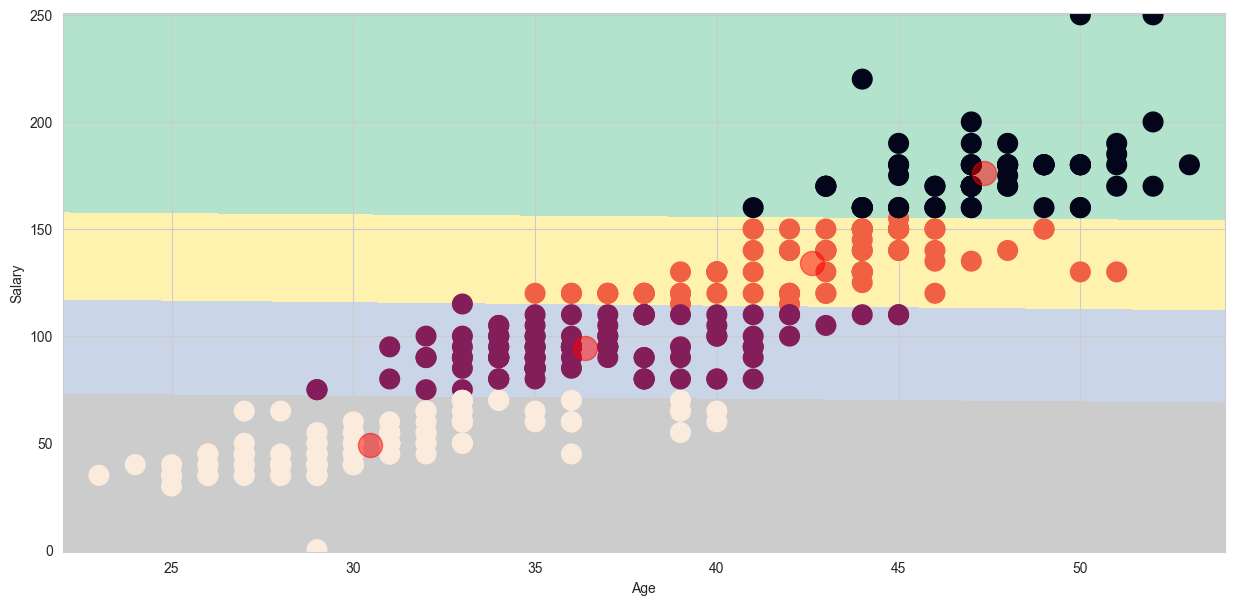

In [66]:
#Рассмотрим кластеризацию используя возраст и зараплату
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Salary' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Salary') , plt.xlabel('Age')
plt.show()


#Вывод к пункту 3: разделив датасет на 4 кластера, мы можем заметить, что, чем старше человек, тем выше его зарплата.

In [67]:
new_df = df[['Age','Years of Experience','Salary']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(new_df)

len(kmeans.labels_)
new_df['cluster'] = kmeans.labels_
new_df.groupby(['cluster']).mean()
#Аналогия к предыдущим графикам в числовом эквиваленте. Датасет можно разделить на кластеры(группы) таким способом.
#В дальнейшем это поможет в работе с определенными группами людей: таргетированная реклама и тд.

#Вывод: в представленном датасете зарплата напрямую зависит от возраста.

,Age,Years of Experience,Salary
cluster,,,
0,42.616438,14.465753,134.315068
1,30.465649,3.507634,49.010305
2,36.365385,9.076923,94.567308
3,47.353846,19.723077,176.230769


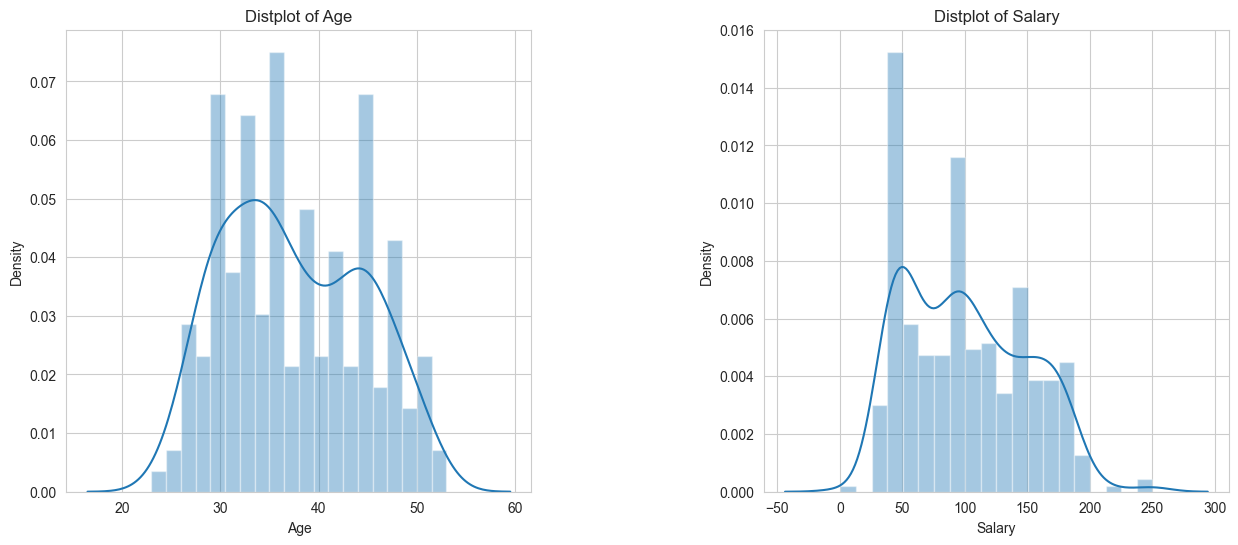

In [68]:
#Рассмотрим распределение зарплаты и возраста.
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Salary']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()
#Распределения похожи на нормальные, однако, заметна отрицательная ассиметрия

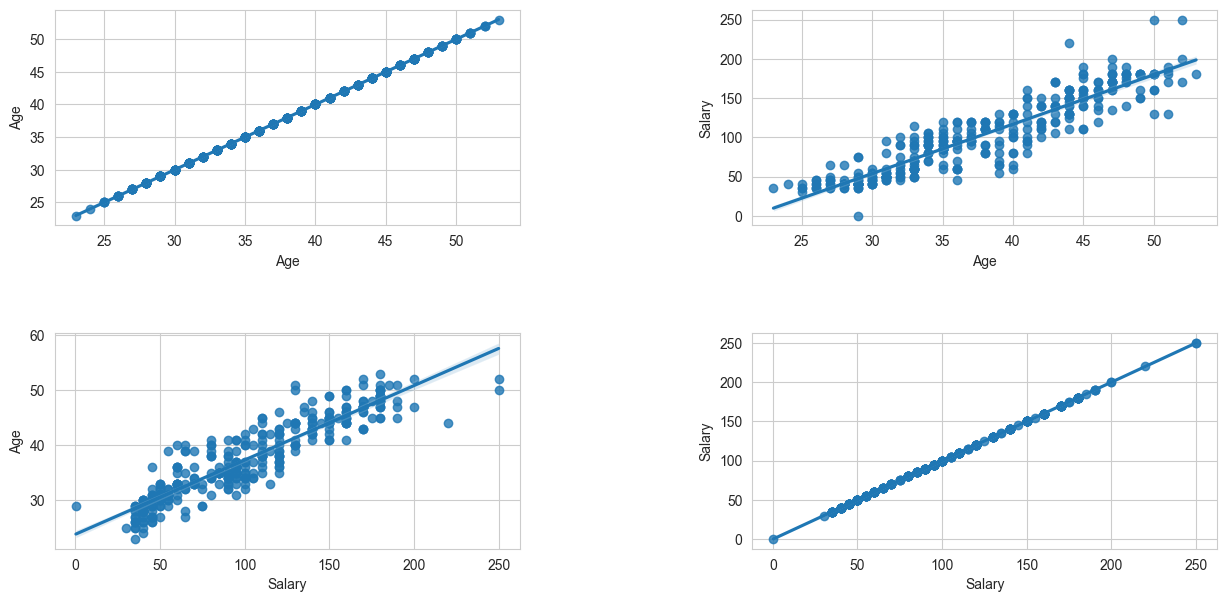

In [69]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Salary']:
    for y in ['Age' , 'Salary']:
        n += 1
        plt.subplot(2 , 2 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()
#Данные зависимости еще раз подтверждают прямую зависимость зарплаты от
#от возраста(коэфф.корреляции приблизительно равен 0,8-0,9)

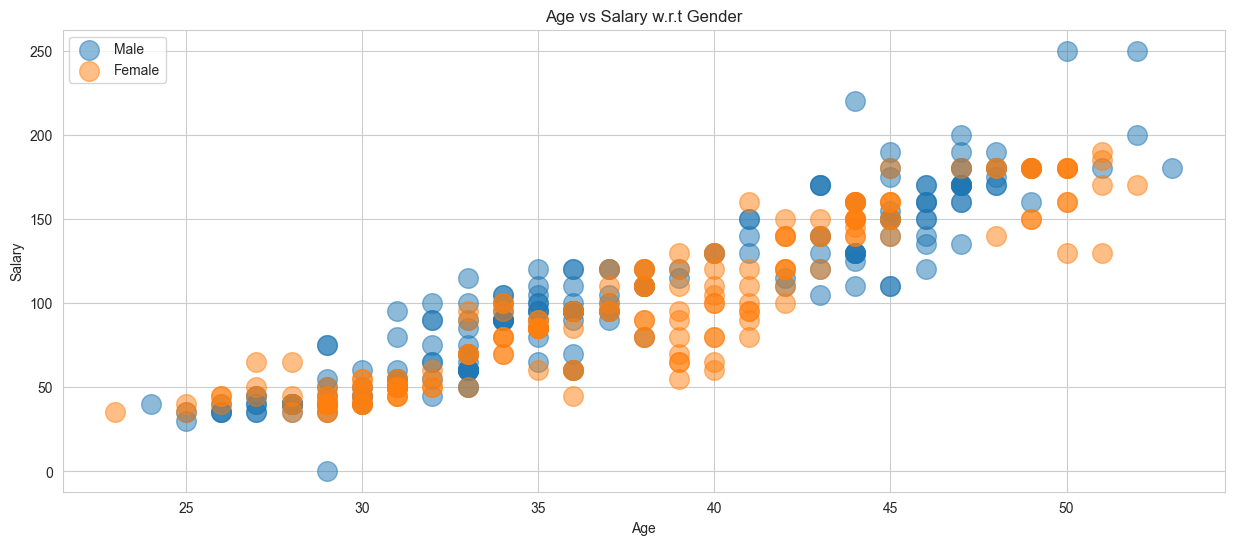

In [70]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Salary' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Salary') 
plt.title('Age vs Salary w.r.t Gender')
plt.legend()
plt.show()

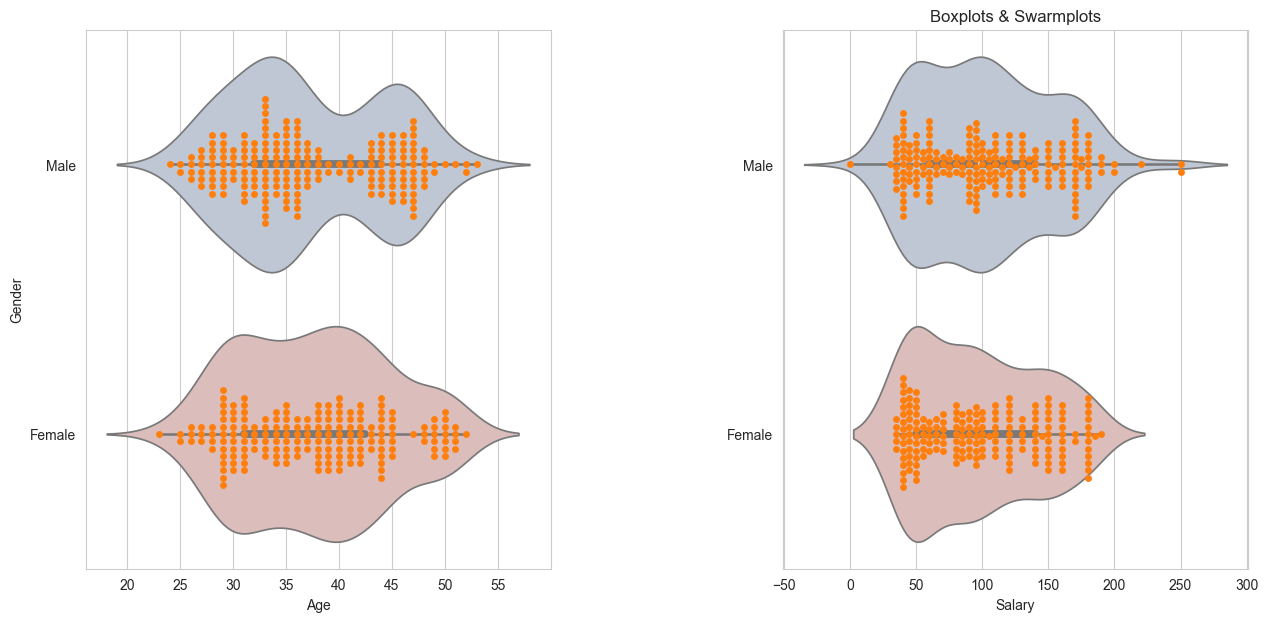

In [71]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Salary' ]:
    n += 1 
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

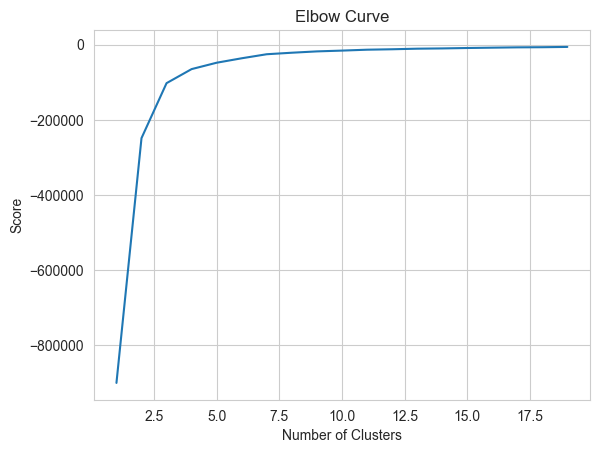

In [72]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(new_df.drop('Age',axis=1))
df_numeric_scaled = pd.DataFrame(minmax_processed, index=new_df.index, columns=new_df.columns[:-1])
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(new_df).score(new_df) for i in range(len(kmeans))]


plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

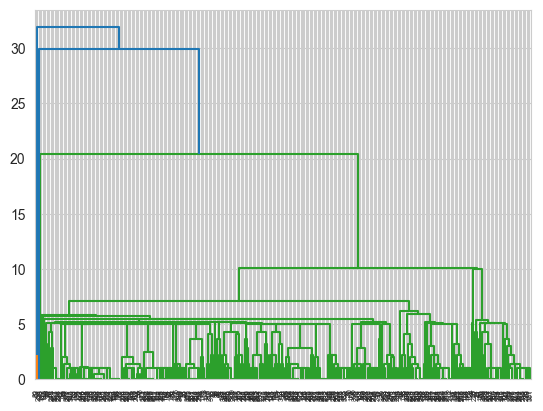

In [73]:
#Single linkage
mergings = linkage(new_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

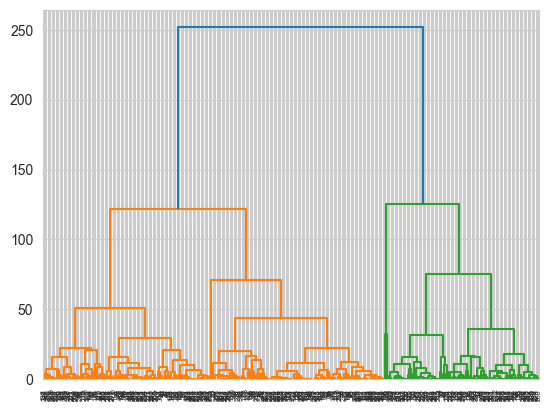

In [74]:
# Complete linkage

mergings = linkage(new_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

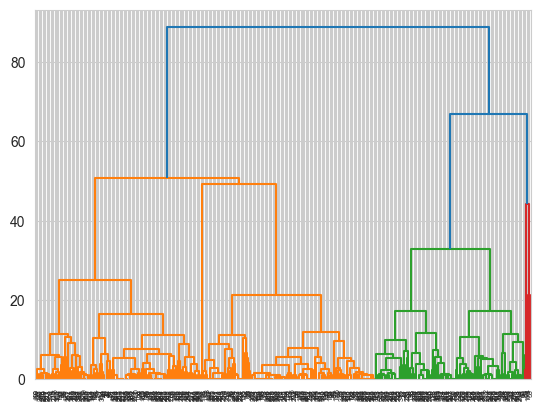

In [75]:
# Average linkage

mergings = linkage(new_df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [76]:
#Рассмотрим трехмерную зависимость Возраста, Стажа и Зарплаты
df['label1'] =  labels1
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Salary'],
    z= df['Years of Experience'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Salary'),
            zaxis = dict(title  = 'Years of Experience')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

KeyError: 'label3'

In [ ]:
#Вывод: Благодаря работе с кластерами возможно распределение элементов для признаков. Группировка элементов очень помагает 
#в таргетировании поставленных целей и, в следствии, экономии ресурсов затраченны.